Text Mining

TWO:

1) Extract reviews of any product from ecommerce website like amazon

2) Perform emotion mining

In [62]:
#import libraries
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import warnings
warnings.filterwarnings("ignore")
import re 
iphone_reviews=[]

Extracting reviews from snapdeal website

In [63]:
########### Extracting reviews from snapdeal website ##############

iphone_snapdeal=[]
url1 = "https://www.snapdeal.com/product/apple-iphone-5c-16-gb/988871559/reviews?page="
url2 = "&sortBy=RECENCY&vsrc=rcnt#defRevPDP"

for i in range(1,10):
  ip=[]  
  base_url = url1+str(i)+url2
  response = requests.get(base_url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  temp = soup.findAll("div",attrs={"class","user-review"})# Extracting the content under specific tags  
  for j in range(len(temp)):
    ip.append(temp[j].find("p").text)
  iphone_snapdeal=iphone_snapdeal+ip  # adding the reviews of one page to empty list which in future contains all the reviews

In [64]:
### Removing repeated reviews 
iphone_snapdeal = list(set(iphone_snapdeal))

In [65]:
# Writing reviews into text file 
with open("ip_snapdeal.txt","w",encoding="utf-8") as snp:
    snp.write(str(iphone_snapdeal))

In [66]:
iphone_snapdeal

['got this at a great discount, the phone is worth it. my wife wanted to try an iphone and she is loving it now',
 "The OS will take around 5GB, leaving only 3 GB for your files. Unless you're not a heavy files user.",
 'It is a nice phone by Apple. Camera is good and phone works perfectly. It is worth a Shot',
 'Superb model , snapdeal delivered as promised time',
 'Quality product from snapdeal. Delivery was on time.',
 'I am happy with my new Iphone. Thanks you for providing me with the product of my choice with the best deal.',
 'Beautiful Product. Original Apple Product and delivery in 2nd day.\nAnd iPhone is iPhone ;-)',
 'Best phone my iPhone',
 'Good Price. Great Seller. Genuine Product. Fast Shipping. Recommended*****',
 "It's really 100% worth to buy this product. I am fully satisfied with this product.",
 'Very good one perfectly the original one with all original accessories',
 'Amazing product at this price....At first I was reluctant to buy an apple product from snapdeal 

In [67]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS

In [68]:
#load dataset
ip_snapd=pd.read_csv('ip_snapdeal.txt',encoding='Latin-1')
ip_snapd

,['got this at a great discount,the phone is worth it. my wife wanted to try an iphone and she is loving it now',"""The OS will take around 5GB","leaving only 3 GB for your files. Unless you're not a heavy files user.""",'It is a nice phone by Apple. Camera is good and phone works perfectly. It is worth a Shot','Superb model,snapdeal delivered as promised time','Quality product from snapdeal. Delivery was on time.','I am happy with my new Iphone. Thanks you for providing me with the product of my choice with the best deal.','Beautiful Product. Original Apple Product and delivery in 2nd day.\nAnd iPhone is iPhone ;-)',...,'Price and delivery service are good I received my order on time','iphone really nice cell','Good Product,Do not hang. Samsung products are pathetic. Used Grand Qauttro which use to take 20-30 seconds to open even contact list.\n\nApple is quality product. Only problem is you need to pay for everything.',"""I'm also happy with Snapdeal service""",'Good price,Great phone,very happy to own one. Recommending to everyone','very good product...thanks to snapdeal and sellers to delivered the original phone :0)','I am very much happy with my product thanks to SNEPDEAL.']


Text processing

In [69]:
ip_snapd=' '.join(ip_snapd)
ip_snapd

'[\'got this at a great discount  the phone is worth it. my wife wanted to try an iphone and she is loving it now\'  "The OS will take around 5GB  leaving only 3 GB for your files. Unless you\'re not a heavy files user."  \'It is a nice phone by Apple. Camera is good and phone works perfectly. It is worth a Shot\'  \'Superb model   snapdeal delivered as promised time\'  \'Quality product from snapdeal. Delivery was on time.\'  \'I am happy with my new Iphone. Thanks you for providing me with the product of my choice with the best deal.\'  \'Beautiful Product. Original Apple Product and delivery in 2nd day.\\nAnd iPhone is iPhone ;-)\'  \'Best phone my iPhone\'  \'Good Price. Great Seller. Genuine Product. Fast Shipping. Recommended*****\'  "It\'s really 100% worth to buy this product. I am fully satisfied with this product."  \'Very good one perfectly the original one with all original accessories\'  \'Amazing product at this price....At first I was reluctant to buy an apple product fr

In [70]:
# Remove Punctuations 
no_punc_text=ip_snapd.translate(str.maketrans('','',string.punctuation))
no_punc_text

'got this at a great discount  the phone is worth it my wife wanted to try an iphone and she is loving it now  The OS will take around 5GB  leaving only 3 GB for your files Unless youre not a heavy files user  It is a nice phone by Apple Camera is good and phone works perfectly It is worth a Shot  Superb model   snapdeal delivered as promised time  Quality product from snapdeal Delivery was on time  I am happy with my new Iphone Thanks you for providing me with the product of my choice with the best deal  Beautiful Product Original Apple Product and delivery in 2nd daynAnd iPhone is iPhone   Best phone my iPhone  Good Price Great Seller Genuine Product Fast Shipping Recommended  Its really 100 worth to buy this product I am fully satisfied with this product  Very good one perfectly the original one with all original accessories  Amazing product at this priceAt first I was reluctant to buy an apple product from snapdeal but the deal made me crazy n I ordered with fingers cr xa0read more

In [71]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'got this at a great discount  the phone is worth it my wife wanted to try an iphone and she is loving it now  The OS will take around 5GB  leaving only 3 GB for your files Unless youre not a heavy files user  It is a nice phone by Apple Camera is good and phone works perfectly It is worth a Shot  Superb model   snapdeal delivered as promised time  Quality product from snapdeal Delivery was on time  I am happy with my new Iphone Thanks you for providing me with the product of my choice with the best deal  Beautiful Product Original Apple Product and delivery in 2nd daynAnd iPhone is iPhone   Best phone my iPhone  Good Price Great Seller Genuine Product Fast Shipping Recommended  Its really 100 worth to buy this product I am fully satisfied with this product  Very good one perfectly the original one with all original accessories  Amazing product at this priceAt first I was reluctant to buy an apple product from snapdeal but the deal made me crazy n I ordered with fingers cr xa0read more

In [72]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Shrijana
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [73]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['got', 'this', 'at', 'a', 'great', 'discount', 'the', 'phone', 'is', 'worth', 'it', 'my', 'wife', 'wanted', 'to', 'try', 'an', 'iphone', 'and', 'she', 'is', 'loving', 'it', 'now', 'The', 'OS', 'will', 'take', 'around', '5GB', 'leaving', 'only', '3', 'GB', 'for', 'your', 'files', 'Unless', 'youre', 'not', 'a', 'heavy', 'files', 'user', 'It', 'is', 'a', 'nice', 'phone', 'by', 'Apple', 'Camera', 'is', 'good', 'and', 'phone', 'works', 'perfectly', 'It', 'is', 'worth', 'a', 'Shot', 'Superb', 'model', 'snapdeal', 'delivered', 'as', 'promised', 'time', 'Quality', 'product', 'from', 'snapdeal', 'Delivery', 'was', 'on', 'time', 'I', 'am', 'happy', 'with', 'my', 'new', 'Iphone', 'Thanks', 'you', 'for', 'providing', 'me', 'with', 'the', 'product', 'of', 'my', 'choice', 'with', 'the', 'best', 'deal', 'Beautiful', 'Product', 'Original', 'Apple', 'Product', 'and', 'delivery', 'in', '2nd', 'daynAnd', 'iPhone', 'is', 'iPhone', 'Best', 'phone', 'my', 'iPhone', 'Good', 'Price', 'Great', 'Seller', 'Genu

In [74]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Shrijana
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Shrijana
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [75]:
# Tokens count
len(text_tokens)

1573

In [76]:
# Remove Stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['got', 'great', 'discount', 'phone', 'worth', 'wife', 'wanted', 'try', 'iphone', 'loving', 'The', 'OS', 'take', 'around', '5GB', 'leaving', '3', 'GB', 'files', 'Unless', 'youre', 'heavy', 'files', 'user', 'It', 'nice', 'phone', 'Apple', 'Camera', 'good', 'phone', 'works', 'perfectly', 'It', 'worth', 'Shot', 'Superb', 'model', 'snapdeal', 'delivered', 'promised', 'time', 'Quality', 'product', 'snapdeal', 'Delivery', 'time', 'happy', 'new', 'Iphone', 'Thanks', 'providing', 'product', 'choice', 'best', 'deal', 'Beautiful', 'Product', 'Original', 'Apple', 'Product', 'delivery', '2nd', 'daynAnd', 'iPhone', 'iPhone', 'Best', 'phone', 'iPhone', 'Good', 'Price', 'Great', 'Seller', 'Genuine', 'Product', 'Fast', 'Shipping', 'Recommended', 'Its', 'really', '100', 'worth', 'buy', 'product', 'fully', 'satisfied', 'product', 'Very', 'good', 'one', 'perfectly', 'original', 'one', 'original', 'accessories', 'Amazing', 'product', 'priceAt', 'first', 'reluctant', 'buy', 'apple', 'product', 'snapdeal', 

In [77]:
# Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['buy', 'apple', 'product', 'snapdeal', 'deal', 'made', 'crazy', 'n', 'ordered', 'fingers', 'cr', 'xa0read', 'awesum', 'phonegood', 'price', 'good', 'productiphone', 'best', 'got', 'iphone', '5c', 'white', 'colour', 'good', 'condition', 'best', 'rate', 'nsnapdeal', 'rate', 'always', 'lowest', 'sites', 'store', 'also', 'easy', 'quick', 'returnsnoriginal', 'productsnngood', 'job', 'snapdealkeep', 'really', 'happy', 'product', 'servicealways', 'best', 'dream', 'come', 'true', 'got', 'ths', 'phone', 'perfect', 'condition', 'thank', 'snapdeal', 'perfect', 'eliveryi', 'guess', 'ur', 'earning', 'trust', 'back', 'nice', 'deal', 'snapdeal', 'good', 'shipping', 'service', 'd', 'phone', 'good', 'ios', 'best', 'os', 'safe', 'also', 'd', 'phone', 'looks', 'great', 'though', 'consists', 'plastic', 'body', 'metal', 'body', 'looks', 'good', 'bt', 'dt', 'nt', 'means', 'plastic', 'body', 'looks', 'cheap', 'plastic', 'may', 'also', 'b']


In [78]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['buy', 'appl', 'product', 'snapdeal', 'deal', 'made', 'crazi', 'n', 'order', 'finger', 'cr', 'xa0read', 'awesum', 'phonegood', 'price', 'good', 'productiphon', 'best', 'got', 'iphon', '5c', 'white', 'colour', 'good', 'condit', 'best', 'rate', 'nsnapdeal', 'rate', 'alway', 'lowest', 'site', 'store', 'also', 'easi', 'quick', 'returnsnorigin', 'productsnngood', 'job', 'snapdealkeep', 'realli', 'happi', 'product', 'servicealway', 'best', 'dream', 'come', 'true', 'got', 'th', 'phone', 'perfect', 'condit', 'thank', 'snapdeal', 'perfect', 'eliveryi', 'guess', 'ur', 'earn', 'trust', 'back', 'nice', 'deal', 'snapdeal', 'good', 'ship', 'servic', 'd', 'phone', 'good', 'io', 'best', 'os', 'safe', 'also', 'd', 'phone', 'look', 'great', 'though', 'consist', 'plastic', 'bodi', 'metal', 'bodi', 'look', 'good', 'bt', 'dt', 'nt', 'mean', 'plastic', 'bodi', 'look', 'cheap', 'plastic', 'may', 'also', 'b']


In [79]:
!pip3 install en_core_web_sm
!python -m spacy download %


[x] No compatible package found for '%' (spaCy v3.6.0)



In [80]:
# Lemmatization
import spacy
from spacy.lang.en.examples import sentences
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

got great discount phone worth wife wanted try iphone loving the os take around 5gb leaving 3 gb files unless youre heavy files user it nice phone apple camera good phone works perfectly it worth shot superb model snapdeal delivered promised time quality product snapdeal delivery time happy new iphone thanks providing product choice best deal beautiful product original apple product delivery 2nd daynand iphone iphone best phone iphone good price great seller genuine product fast shipping recommended its really 100 worth buy product fully satisfied product very good one perfectly original one original accessories amazing product priceat first reluctant buy apple product snapdeal deal made crazy n ordered fingers cr xa0read awesum phonegood price good productiphone best got iphone 5c white colour good condition best rate nsnapdeal rate always lowest sites store also easy quick returnsnoriginal productsnngood job snapdealkeep really happy product servicealways best dream come true got ths

In [81]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['get', 'great', 'discount', 'phone', 'worth', 'wife', 'want', 'try', 'iphone', 'love', 'the', 'os', 'take', 'around', '5', 'gb', 'leave', '3', 'gb', 'file', 'unless', 'you', 're', 'heavy', 'file', 'user', 'it', 'nice', 'phone', 'apple', 'camera', 'good', 'phone', 'work', 'perfectly', 'it', 'worth', 'shoot', 'superb', 'model', 'snapdeal', 'deliver', 'promise', 'time', 'quality', 'product', 'snapdeal', 'delivery', 'time', 'happy', 'new', 'iphone', 'thank', 'provide', 'product', 'choice', 'good', 'deal', 'beautiful', 'product', 'original', 'apple', 'product', 'delivery', '2nd', 'daynand', 'iphone', 'iphone', 'good', 'phone', 'iphone', 'good', 'price', 'great', 'seller', 'genuine', 'product', 'fast', 'shipping', 'recommend', 'its', 'really', '100', 'worth', 'buy', 'product', 'fully', 'satisfied', 'product', 'very', 'good', 'one', 'perfectly', 'original', 'one', 'original', 'accessory', 'amazing', 'product', 'priceat', 'first', 'reluctant', 'buy', 'apple', 'product', 'snapdeal', 'deal', 'm

In [82]:
clean_comments=' '.join(lemmas)
clean_comments

'get great discount phone worth wife want try iphone love the os take around 5 gb leave 3 gb file unless you re heavy file user it nice phone apple camera good phone work perfectly it worth shoot superb model snapdeal deliver promise time quality product snapdeal delivery time happy new iphone thank provide product choice good deal beautiful product original apple product delivery 2nd daynand iphone iphone good phone iphone good price great seller genuine product fast shipping recommend its really 100 worth buy product fully satisfied product very good one perfectly original one original accessory amazing product priceat first reluctant buy apple product snapdeal deal make crazy n order finger cr xa0read awesum phonegood price good productiphone well get iphone 5c white colour good condition good rate nsnapdeal rate always low site store also easy quick returnsnoriginal productsnngood job snapdealkeep really happy product servicealway good dream come true get ths phone perfect conditio

Feature Extaction

1. Using CountVectorizer

In [83]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
clean_commentscv=cv.fit_transform(lemmas)

In [84]:
print(cv.vocabulary_)

{'get': 140, 'great': 148, 'discount': 100, 'phone': 245, 'worth': 407, 'wife': 399, 'want': 393, 'try': 381, 'iphone': 173, 'love': 193, 'the': 358, 'os': 234, 'take': 352, 'around': 29, 'gb': 138, 'leave': 186, 'file': 127, 'unless': 382, 'you': 411, 're': 284, 'heavy': 158, 'user': 389, 'it': 177, 'nice': 221, 'apple': 28, 'camera': 55, 'good': 143, 'work': 405, 'perfectly': 242, 'shoot': 319, 'superb': 348, 'model': 207, 'snapdeal': 334, 'deliver': 95, 'promise': 268, 'time': 369, 'quality': 277, 'product': 264, 'delivery': 96, 'happy': 152, 'new': 219, 'thank': 355, 'provide': 273, 'choice': 63, 'deal': 91, 'beautiful': 41, 'original': 233, '2nd': 6, 'daynand': 90, 'price': 256, 'seller': 310, 'genuine': 139, 'fast': 124, 'shipping': 318, 'recommend': 291, 'its': 180, 'really': 286, '100': 1, 'buy': 54, 'fully': 137, 'satisfied': 301, 'very': 392, 'one': 227, 'accessory': 12, 'amazing': 23, 'priceat': 257, 'first': 131, 'reluctant': 292, 'make': 196, 'crazy': 82, 'order': 232, 'fi

In [85]:
print(cv.get_feature_names()[100:200])

['discount', 'dispatchnprosn1', 'display', 'do', 'doubt', 'doubted', 'doubtfull', 'dream', 'dt', 'due', 'earn', 'easy', 'eliveryi', 'emi', 'essy', 'even', 'ever', 'everyone', 'everything', 'excellent', 'expectation', 'experience', 'fake', 'family', 'fast', 'feature', 'feel', 'file', 'fill', 'find', 'finger', 'first', 'five', 'flaw', 'fraudulent', 'free', 'friend', 'fully', 'gb', 'genuine', 'get', 'gift', 'go', 'good', 'goodbut', 'goood', 'got', 'grand', 'great', 'guess', 'hahahaha', 'hang', 'happy', 'happyalso', 'have', 'headphone', 'hear', 'heat', 'heavy', 'hesitate', 'honest', 'honestly', 'hour', 'however', 'hv', 'in', 'initially', 'inter', 'interaction', 'interest', 'io', 'ios', 'ios9', 'iphone', 'iphone5c', 'iphoneearli', 'issue', 'it', 'item', 'itnniphone', 'its', 'job', 'lack', 'lag', 'lagging', 'late', 'leave', 'level', 'like', 'limit', 'listnnapple', 'little', 'look', 'love', 'lovely', 'low', 'make', 'manufacturer', 'mark', 'marvallous']


In [86]:
print(clean_commentscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [87]:
print(clean_commentscv.toarray().shape)

(1028, 412)


2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [88]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [89]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['100', '5c', 'also', 'amazing', 'and', 'apple', 'available', 'awesome', 'awsme', 'battery', 'body', 'box', 'brand', 'budget', 'but', 'buy', 'camera', 'cheap', 'condition', 'day', 'deal', 'deliver', 'delivery', 'do', 'even', 'excellent', 'experience', 'fast', 'file', 'gb', 'genuine', 'get', 'go', 'good', 'got', 'great', 'hang', 'happy', 'have', 'interest', 'io', 'ios', 'iphone', 'issue', 'it', 'its', 'late', 'like', 'look', 'low', 'memory', 'mobile', 'need', 'new', 'nice', 'not', 'one', 'order', 'original', 'pack', 'perfect', 'phone', 'plastic', 'price', 'problem', 'product', 'quality', 'really', 'receive', 'recommend', 'satisfactory', 'satisfied', 'say', 'seller', 'service', 'shipping', 'site', 'snap', 'snapdeal', 'so', 'space', 'superb', 'take', 'thank', 'the', 'think', 'this', 'though', 'till', 'time', 'true', 'update', 'use', 'very', 'want', 'well', 'within', 'worth', 'would', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]

3. TF-IDF Vectorizer

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [91]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['10', '100', '1000rs', '2030', '20k', '24', '2nd', '5c', '5cnnsnapdeal', '6s', '9nncons', 'absolutly', 'accessory', 'account', 'action', 'ad', 'adorable', 'affordable', 'after', 'almost', 'already', 'also', 'always', 'amazing', 'and', 'andriodblackberrywindow', 'android', 'app', 'apple', 'around', 'as', 'attractive', 'available', 'awesome', 'awesum', 'awsme', 'awwsum', 'back', 'battery', 'be', 'beatifully', 'beautiful', 'believe', 'bit', 'bluetooth', 'body', 'bodyn2', 'box', 'brand', 'bt', 'budget', 'build', 'business', 'but', 'buy', 'camera', 'can', 'capacity', 'care', 'category', 'cell', 'charge', 'cheap', 'choice', 'choose', 'class', 'close', 'colour', 'come', 'commit', 'compare', 'competitive', 'con', 'condition', 'conditionnno', 'consist', 'contact', 'cool', 'costly', 'coupon', 'courier', 'cr', 'crazy', 'credit', 'crisp', 'customer', 'damage', 'dat', 'datum', 'day', 'daynand', 'deal', 'dear', 'decide', 'defination', 'deliver', 'delivery', 'delivry', 'dere', 'dis', 'discount', 'di

Generate Word Cloud

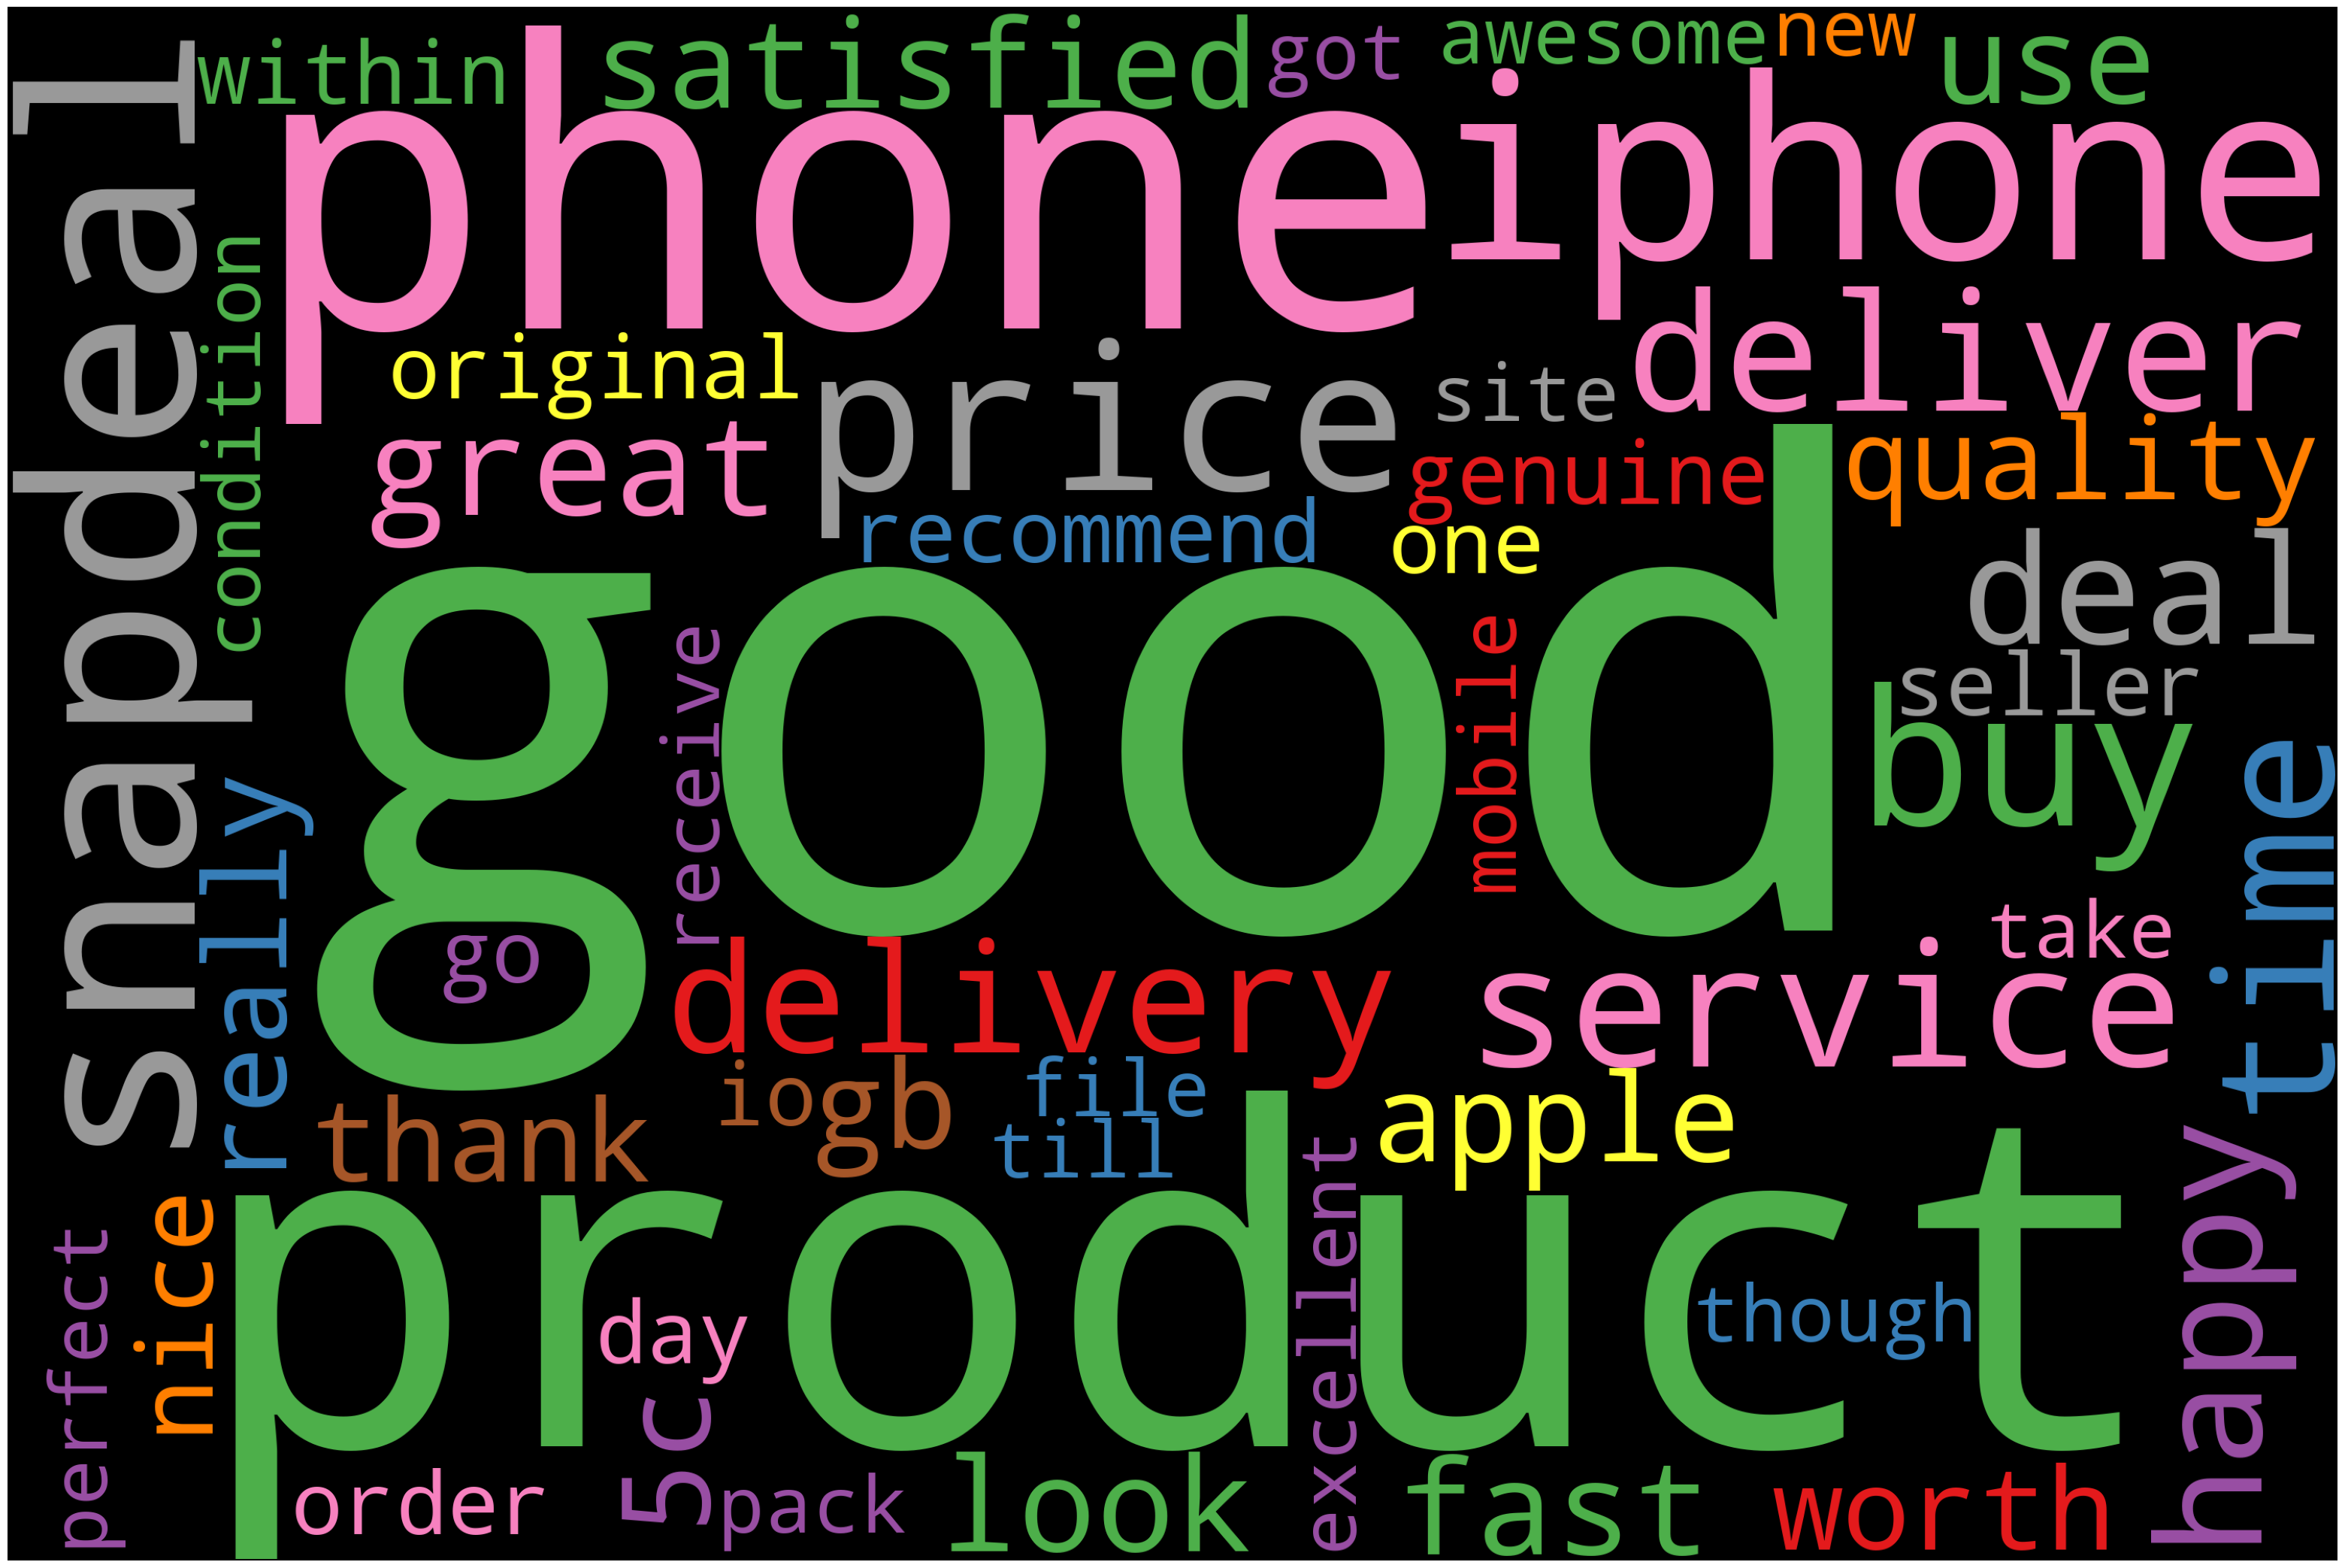

In [92]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_comments)
plot_cloud(wordcloud)

Named Entity Recognition (NER)

In [93]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_comments
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [94]:
for token in doc_block[100:200]:
    print(token,token.pos_)

first ADV
reluctant ADJ
buy VERB
apple NOUN
product NOUN
snapdeal ADJ
deal NOUN
make VERB
crazy ADJ
n NOUN
order NOUN
finger NOUN
cr PROPN
xa0read PUNCT
awesum PROPN
phonegood PROPN
price NOUN
good ADJ
productiphone NOUN
well INTJ
get VERB
iphone NOUN
5c NUM
white ADJ
colour NOUN
good ADJ
condition NOUN
good ADJ
rate NOUN
nsnapdeal NOUN
rate NOUN
always ADV
low ADJ
site NOUN
store NOUN
also ADV
easy ADV
quick ADJ
returnsnoriginal ADJ
productsnngood NOUN
job NOUN
snapdealkeep VERB
really ADV
happy ADJ
product NOUN
servicealway NOUN
good ADJ
dream NOUN
come VERB
true ADJ
get VERB
ths NOUN
phone NOUN
perfect ADJ
condition NOUN
thank VERB
snapdeal ADV
perfect ADJ
eliveryi NOUN
guess VERB
ur PRON
earn VERB
trust NOUN
back ADV
nice ADJ
deal NOUN
snapdeal ADJ
good ADJ
shipping NOUN
service NOUN
d NOUN
phone NOUN
good NOUN
io INTJ
good ADJ
os INTJ
safe ADJ
also ADV
d NOUN
phone NOUN
look NOUN
great ADJ
though SCONJ
consist ADJ
plastic NOUN
body NOUN
metal NOUN
body NOUN
look VERB
good ADJ
bt I

In [95]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['phone', 'look', 'plastic', 'body', 'metal', 'body', 'look', 'mean', 'body', 'look', 'plastic', 'look', 'camera', 'superb', 'battery', 'dere', 'problem', 'space', 'say', 'phone', 'problem', 'choose', 'gb', 'phone', 'flaw', 'word', 'say', 'phone', 'dis', 'price', 'thumb', 'apple', 'product', 'product', 'awwsum', 'use', 'look', 'defination', 'prefer', 'nxt', 'time', 'service', 'quality', 'level', 'interaction', 'good', 'iphone', 'apple', 'service', 'lack', 'feel', 'budget', 'iphone', 'go', 'want', 'iphone', 'experience', 'iphone', 'price', 'rangeni', 'recommend', 'phone', 'mush', 'deal', 'iphone', 'product', 'price', 'day', 'get', 'product', 'site', 'working', 'day', 'phoneever', 'buy', 'iphone', 'order', 'phone', 'doubt', 'receive', 'phone', 'find', 'product', 'service', 'snap', 'deal', 'value', 'money', 'pay', 'item', 'pack', 'deliver', 'time', 'deliver', 'seal', 'box', 'deal', 'goood', 'ship', 'product']


In [96]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,product,40
1,phone,28
2,iphone,27
3,price,17
4,buy,15
5,service,12
6,deliver,11
7,time,11
8,delivery,11
9,deal,11


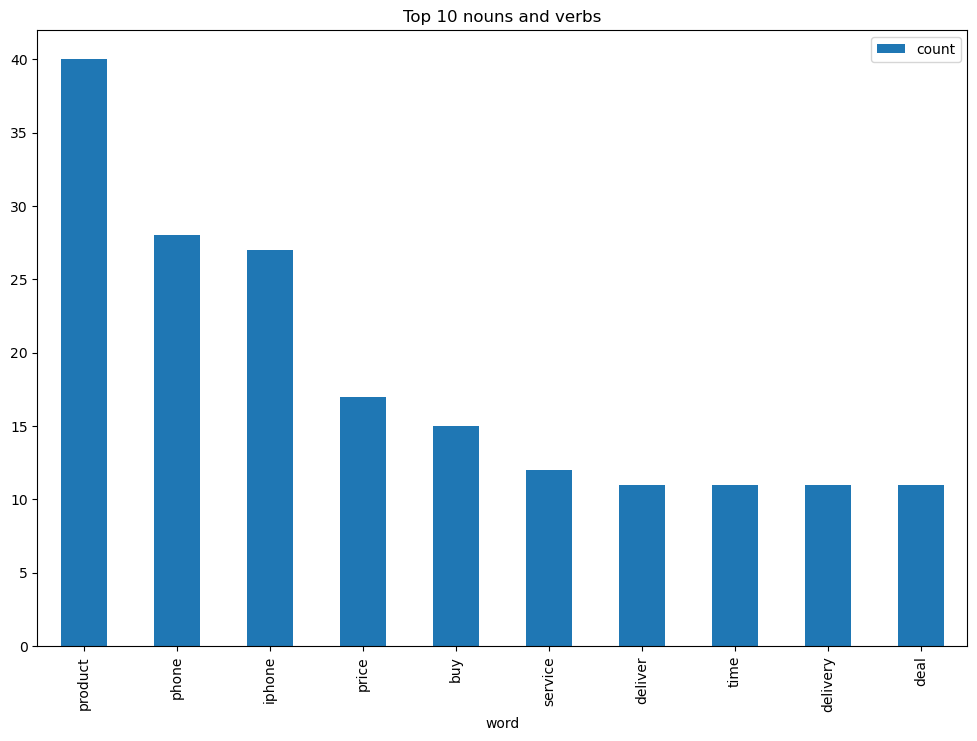

In [97]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

Emotion Mining - Sentiment Analysis

In [98]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(''.join(ip_snapd))
sentences

["['got this at a great discount  the phone is worth it.",
 'my wife wanted to try an iphone and she is loving it now\'  "The OS will take around 5GB  leaving only 3 GB for your files.',
 'Unless you\'re not a heavy files user."',
 "'It is a nice phone by Apple.",
 'Camera is good and phone works perfectly.',
 "It is worth a Shot'  'Superb model   snapdeal delivered as promised time'  'Quality product from snapdeal.",
 "Delivery was on time.'",
 "'I am happy with my new Iphone.",
 "Thanks you for providing me with the product of my choice with the best deal.'",
 "'Beautiful Product.",
 "Original Apple Product and delivery in 2nd day.\\nAnd iPhone is iPhone ;-)'  'Best phone my iPhone'  'Good Price.",
 'Great Seller.',
 'Genuine Product.',
 'Fast Shipping.',
 'Recommended*****\'  "It\'s really 100% worth to buy this product.',
 'I am fully satisfied with this product."',
 "'Very good one perfectly the original one with all original accessories'  'Amazing product at this price....At firs

In [99]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,['got this at a great discount the phone is w...
1,my wife wanted to try an iphone and she is lov...
2,"Unless you're not a heavy files user."""
3,'It is a nice phone by Apple.
4,Camera is good and phone works perfectly.
...,...
107,Samsung products are pathetic.
108,Used Grand Qauttro which use to take 20-30 sec...
109,Only problem is you need to pay for everything.'
110,"""I'm also happy with Snapdeal service"" 'Good ..."


In [100]:
# Emotion Lexicon - Affin
affin=pd.read_csv('D:/Assignments/afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [101]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [102]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [103]:
# manual testing
calculate_sentiment(text='great')

3

In [104]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0       5
1       3
2       0
3       3
4       6
       ..
107    -2
108     0
109    -3
110    12
111    12
Name: sentiment_value, Length: 112, dtype: int64

In [105]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      11
1      26
2       7
3       7
4       7
       ..
107     4
108    17
109     9
110    15
111    27
Name: word_count, Length: 112, dtype: int64

In [106]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
65,But those all reviews are fake and just to dam...,-6,14
58,Dont buy on fraudulent schemes.',-4,5
25,Dere is only one problem nd dat is space... Bt...,-4,20
109,Only problem is you need to pay for everything.',-3,9
64,"Overall performance is Good' ""Honestly speaki...",-2,16
...,...,...,...
106,Also the delivery was very prompt as well.\n\...,15,63
43,'Pros : Picture quality is awesome sound with...,15,41
101,Product is quite good and I also updated it to...,16,55
17,'Really happy with the product and service..al...,21,40


In [107]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    112.000000
mean       3.258929
std        4.666819
min       -6.000000
25%        0.000000
50%        2.000000
75%        5.000000
max       21.000000
Name: sentiment_value, dtype: float64

In [108]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
2,"Unless you're not a heavy files user.""",0,7
6,Delivery was on time.',0,4
9,'Beautiful Product.,0,2
12,Genuine Product.,0,2
13,Fast Shipping.,0,2
24,Battery also.,0,2
25,Dere is only one problem nd dat is space... Bt...,-4,20
26,I hv chosen d 8gb phone so it's my flaw.,0,10
34,Within one day I got the product though in sit...,0,14
36,But after receiving this phone I am really ver...,-1,25


In [109]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,['got this at a great discount the phone is w...,5,11
1,my wife wanted to try an iphone and she is lov...,3,26
3,'It is a nice phone by Apple.,3,7
4,Camera is good and phone works perfectly.,6,7
5,It is worth a Shot' 'Superb model snapdeal ...,8,16
...,...,...,...
102,After using android for 3 years I was not sat...,2,13
105,So decided that I will buy iPhone 5C.\n\nSnap...,3,20
106,Also the delivery was very prompt as well.\n\...,15,63
110,"""I'm also happy with Snapdeal service"" 'Good ...",12,15


In [110]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,['got this at a great discount the phone is w...,5,11,0
1,my wife wanted to try an iphone and she is lov...,3,26,1
2,"Unless you're not a heavy files user.""",0,7,2
3,'It is a nice phone by Apple.,3,7,3
4,Camera is good and phone works perfectly.,6,7,4
...,...,...,...,...
107,Samsung products are pathetic.,-2,4,107
108,Used Grand Qauttro which use to take 20-30 sec...,0,17,108
109,Only problem is you need to pay for everything.',-3,9,109
110,"""I'm also happy with Snapdeal service"" 'Good ...",12,15,110


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

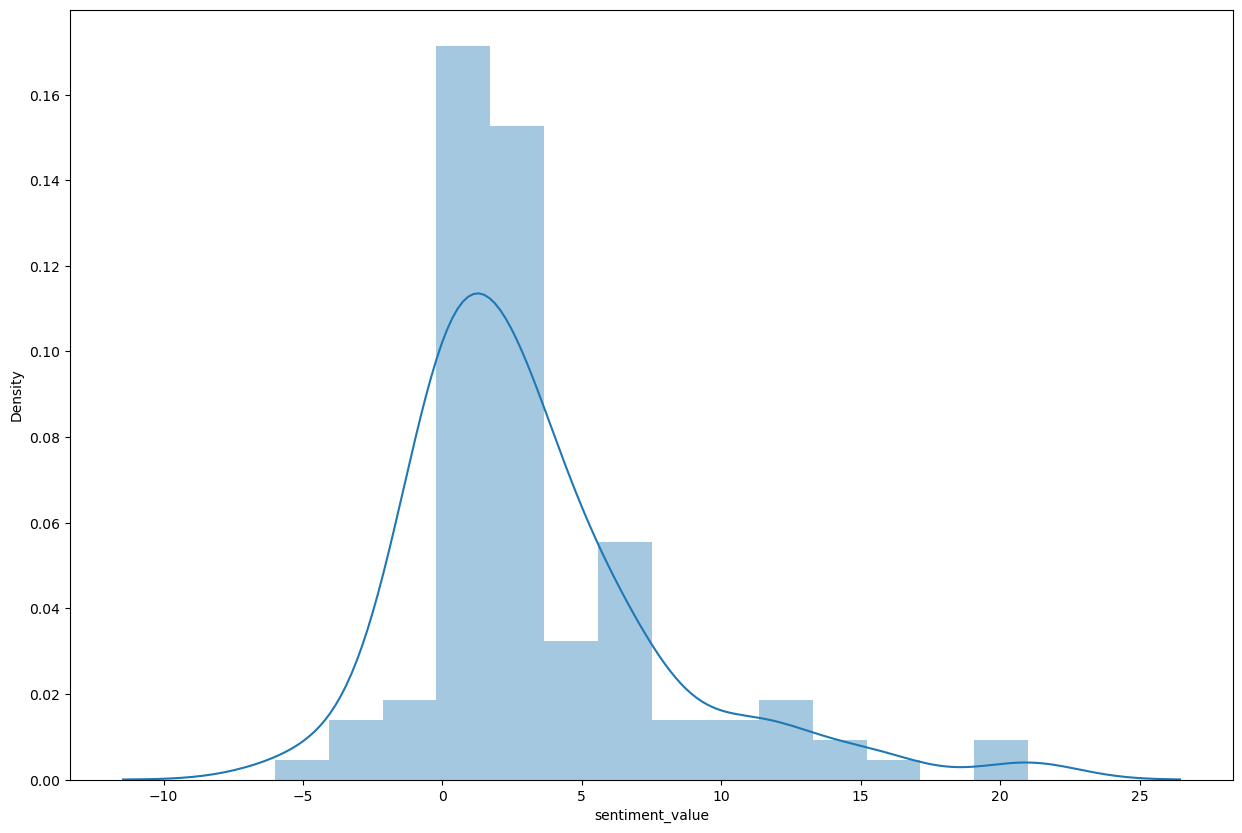

In [111]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

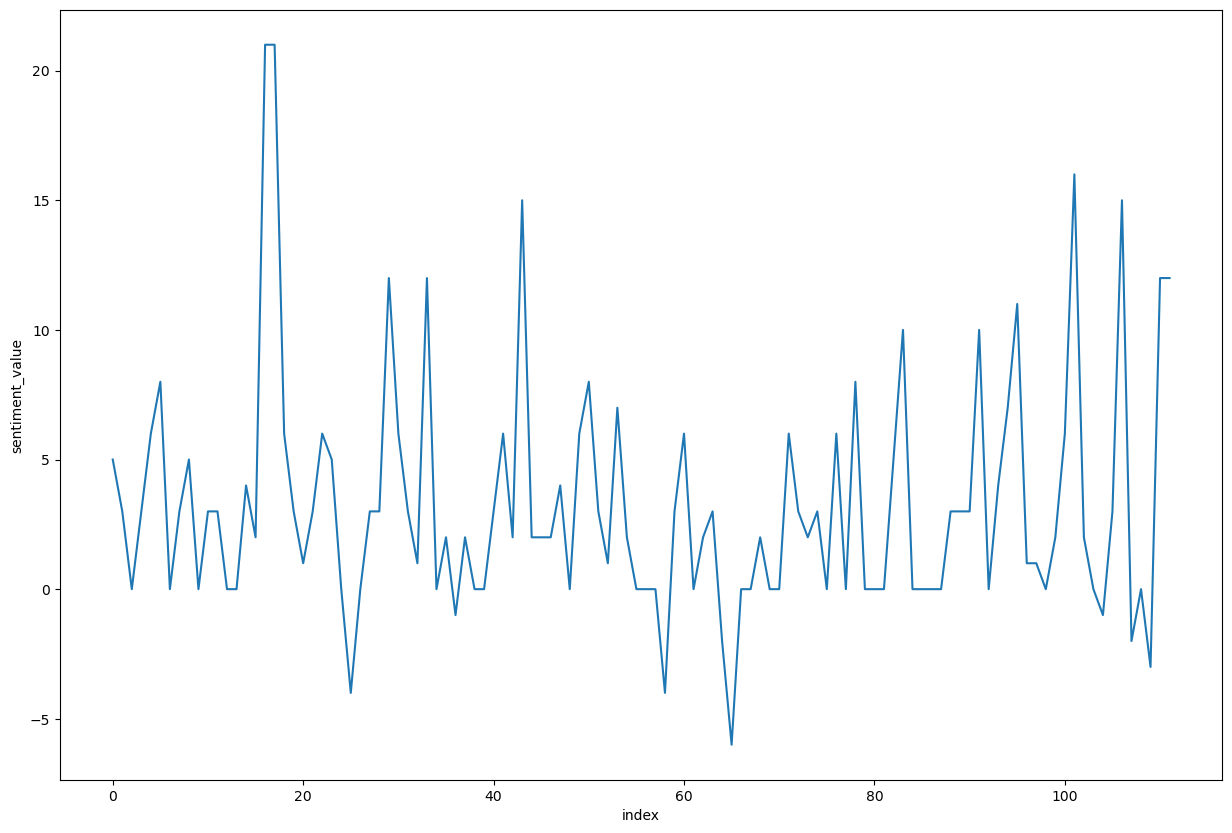

In [112]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

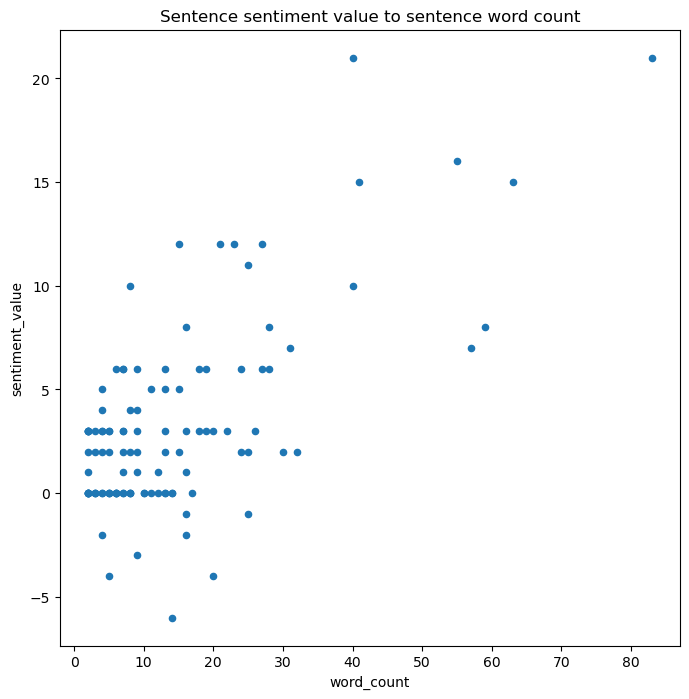

In [113]:
# Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')